In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import units_convertion as uconv
import propagation as prop

# Рассчитать мощность сигнала на входе приемника РРЛ и запас на  замирания, построить диаграмму уровней сигнала на пролете и   профиль трассы. 

In [9]:
# Вариант 7
P_tx = 1.5  # Wt
P_tx_db = uconv.P2db(P_tx)
G_tx = 45   # dB
G_rx = 35   # dB
S_rx = -135 # dB (rx sensetivity)
nu = -3.6   # dB
f = 8.2e9   # Hz

PHI = 0.3
refraction = -8e-8

H_tx = 10
H_rx = 30

Rt = np.linspace(0, 5e3, 11)
ht = np.array([10, 5, 1, 2, 10, 12, 10, 7, 5, 6, 8])

In [18]:
prop.re_refraction(refraction)*1e-3

8549.841644747436

<IPython.core.display.Javascript object>


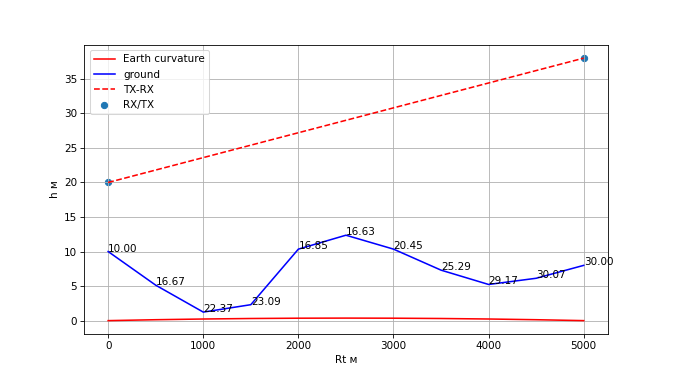

min_clr=16.63
Rt_min_clr=2500.00


In [19]:
%matplotlib notebook
y, y_tx, y_rx, h_clr = prop.track_clearance(Rt, ht, H_tx, H_rx, refraction)

prop.plot_clearance(Rt, y, y_tx, y_rx, h_clr, refraction)

l_brd = 2
r_brd = -2
h_clr_min = np.min(h_clr[l_brd:r_brd])
R_clr_min = Rt[l_brd:r_brd][np.argmin(h_clr[l_brd:r_brd])]
print('min_clr={:.2f}'.format(h_clr_min))
print('Rt_min_clr={:.2f}'.format(R_clr_min))

In [20]:
W0_db = prop.free_space_loss_db(uconv.f2lamb(f), Rt[-1])
V_interf_db = prop.V_interf_attenuation_db(PHI, refraction, f, Rt[-1], R_clr_min, h_clr_min, print_en=True)
print()

p_h20 = 7.5
t = 20
V_atmospher_db = prop.atmospher_attenuation_db_per_km(f, p_h20, t, print_en=True) * (Rt[-1] - Rt[0])/1e3
print()

print("W0 = {} dB".format(W0_db))
print("V_interf = {} dB".format(V_interf_db))
print()
print("g_oxygen = {} dB".format(prop.oxygen_attenuation_db_per_km(f)))
print("g_h20 = {} dB".format(prop.h20_attenuation_db_per_km(f, p_h20)))
print("V_atmospher = {} dB".format(V_atmospher_db))


V_interf_attenuation calculation:
	dH = 0.125 m
	H0 = 4.014082148267324 m
	p(ref) = 4.175148326547496
	V_interf = 0.7701262598802369 dB

atmospher attenuation calculation:
	f=8.200 GHz, t=20, p_h20=7.5
	g_ox = 0.006688690082812421 dB/km
	g_h20 = 0.0042254273213449805 dB/km
	g = 0.009312054703613286 dB/km

W0 = -124.21592228944118 dB
V_interf = 0.7701262598802369 dB

g_oxygen = 0.006688690082812421 dB
g_h20 = 0.0042254273213449805 dB
V_atmospher = 0.04656027351806643 dB


In [21]:
P_rx = P_tx_db + G_tx + G_rx + 2*nu + W0_db - V_interf_db - V_atmospher_db
P_rx

-50.471696232282675

In [22]:
P_rx - S_rx

84.52830376771732

<IPython.core.display.Javascript object>


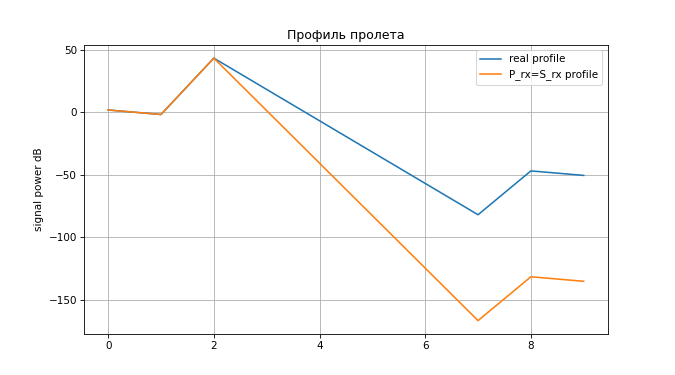

In [15]:
%matplotlib notebook

fig = plt.figure(figsize=(9, 5))

profile = []
profile.append( np.array([0, P_tx_db]) )
profile.append( profile[-1] + np.array([1, nu]) )
profile.append( profile[-1] + np.array([1, G_tx]) )
profile.append( profile[-1] + np.array([5, W0_db - V_interf_db - V_atmospher_db]) )
profile.append( profile[-1] + np.array([1, G_rx]) )
profile.append( profile[-1] + np.array([1, nu]) )
profile = np.array(profile)

profile_b = []
profile_b.append( np.array([0, P_tx_db]) )
profile_b.append( profile_b[-1] + np.array([1, nu]) )
profile_b.append( profile_b[-1] + np.array([1, G_tx]) )
profile_b.append( profile_b[-1] + np.array([5, W0_db - V_interf_db - V_atmospher_db - (P_rx - S_rx)]) )
profile_b.append( profile_b[-1] + np.array([1, G_rx]) )
profile_b.append( profile_b[-1] + np.array([1, nu]) )
profile_b = np.array(profile_b)

plt.plot(profile[:, 0], profile[:, 1], label='real profile')
plt.plot(profile_b[:, 0], profile_b[:, 1], label='P_rx=S_rx profile')


plt.ylabel("signal power dB")
plt.title("Профиль пролета")

plt.grid(True)
plt.legend()